# Worksheet 16

Due Tuesday night (instead of the usual Monday due date), because of the Memorial Day holiday.

You are encouraged to work in groups of up to 3 total students, but each student should make their own submission on Canvas.  (It's fine for everyone in the group to have the same upload.)

Put the **full names** of everyone in your group (even if you're working alone) here.  (This makes grading easier.)

* **Names**: 

## Introduction

In this worksheet, we will use a random forest classifier to classify handwritten digits.  In discussion section on Thursday of Week 7, we got a 93% accuracy on this dataset using logistic regression.  This is already very good.  (We didn't use a test set at that time, so it is possible there was some overfitting.)

## Question 0 - Setting up the workspace

Make sure you are working in a (free) Pro Deepnote workspace; see the [Worksheet 1 instructions](https://christopherdavisuci.github.io/UCI-Math-10-S23/Week1/Worksheet1.html#instructions-to-create-a-workspace-for-your-group).  The computations are more memory-intensive than usual in this worksheet.  It should say "Education" in the lower-left corner.

## Question 1 - Loading the data

* Load the attached "mnist" dataset and assign it to the variable name `df_pre`.

Reminder: This dataset contains about half the rows from the "usual" MNIST dataset.

In [1]:
import pandas as pd

In [2]:
df_pre = pd.read_csv("mnist.csv")

* Assign the input features portion of the DataFrame to the variable `X` and the target portion of the DataFrame to the variable `y`.  (See the Thursday Week 7 notebook on Deepnote.)

In [3]:
X = df_pre.iloc[:,1:]
y = df_pre["label"]

In [4]:
df_pre

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X, y

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 41995       0       0       0       0       0       0       0       0       0   
 41996       0       0       0       0       0       0       0       0       0   
 41997       0       0       0       0       0       0       0       0       0   
 41998       0       0       0       0       0       0       0       0       0   
 41999       0       0       0       0       0       0       0       0       0   
 
        pixel9

* The target variable `y` contains numbers, but it would be a mistake to treat this as a regression problem.  This is a classification problem.  Why do you think this is a classification problem?  Answer in a markdown cell.

Possible hint.  The target values should not even be viewed as being ordered, or at least, the ordering is not relevant to our predictions.  The target values should have a Nominal data type, in the Altair terminoloty.

y contains label numbers, although these values are numbers, they act more as a name for the label, "label 1", "label 2", thus they act as a nominal data type thus this becomes a classification problem

* How many bytes is `X`?  Use the `getsizeof` function from the `sys` module.  Make the number easier to read by using an f-string and including commas: `print(???"The pandas DataFrame X is {???:,} bytes.")`.  This is significantly bigger than our usual datasets (but it still probably does not qualify as "big data").

In [6]:
from sys import getsizeof

In [7]:
print(f"The pandas DataFrame X is {getsizeof(X):,} bytes.")

The pandas DataFrame X is 263,424,160 bytes.


* Does that approximately match what is reported by calling the `info` method?

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


it is aproximately the same

* Divide `X` and `y` into a training set and a test set, `X_train, X_test, y_train, y_test`, by using `train_test_split` with a `train_size` of `0.8` and a `random_state` of `0`.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= .8, random_state=0)

* Check your answer: `y_test` should be a length 8400 pandas Series.  The first three values in `y_test` should be `3`, `6`, `9`.

In [11]:
y_test

16275    3
19204    6
18518    9
25780    5
16228    6
        ..
30285    9
18020    2
26193    2
26564    7
27420    2
Name: label, Length: 8400, dtype: int64

## Question 2 - Displaying a handwritten digit

* We just saw that `y_test.iloc[0]` corresponds to the digit `3`.  Display the corresponding handwritten digit from `X_test` using `ax.imshow` where `ax` is a Matplotlib Axes object.  Again, see the Week 7 Thursday notebook for a reminder of how to do this.

In [12]:
import matplotlib.pyplot as plt

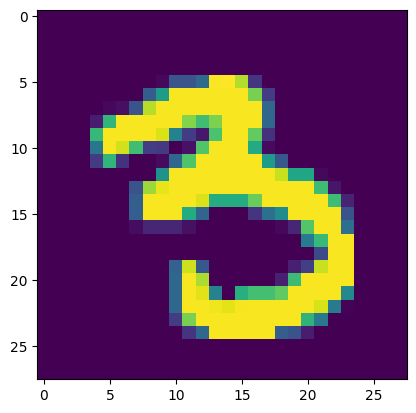

In [13]:
fig, ax = plt.subplots()
ax.imshow(X_test.iloc[0].values.reshape(28,28))

## Question 3 - Fitting a random forest classifier

Your goal in this question is to get a test accuracy of at least 92% using a random forest classifier.

* Import the `RandomForestClassifier` class from scikit-learn's `ensemble` module.
* Create an instance of this class and name it `rfc` (for random forest classifier).  Experiment with different values of `n_estimators`, `max_depth` and/or `max_leaf_nodes`.  Also use `random_state` to get reproducible results.  Fit the classifier to the training data.  Try to find values which yield a test score (`rfc.score(X_test, y_test)`) of at least `0.92`.

**Warning**.  Be sure you are calling `fit` using the training data, not the full data and not the test data.

**Warning**.  Start with small values and work your way up.  If you start with even medium-sized values, the computer may run out of memory and you will have to restart the notebook.  The `fit` step for my values took about 20 seconds.

**Comment**.  This might seem to be performing worse than our logistic regression model, but that is partially because we did not use a test set with our logistic regression model.


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier(n_estimators= 400, max_depth= 350 , max_leaf_nodes= 100, random_state=18)

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=350, max_leaf_nodes=100, n_estimators=400,
                       random_state=18)

In [17]:
rfc.score(X_test, y_test)

0.9158333333333334

## Question 4 - The individual trees in the random forest

* What type of object is `rfc.estimators_`? (This and the following questions will only work if you have fit `rfc` in the previous step.)
* What is the length of `rfc.estimators_`?
* How does the length of `rfc.estimators_` relate to the parameters you used above?  Answer in a markdown cell.
* What is the type of the zero-th element in `rfc.estimators_`?
* Using list comprehension, make a list `score_list` containing `clf.score(X_test.values, y_test.values)` for each classifier in `rfc.estimators_`.  (The individual trees in the random forest are trained without the feature names, presumably to save memory, so that's why we use for example `X_test.values` instead of `X_test`.)
* What is the maximum value in `score_list`?
* How does this result relate to the expression, "greater than the sum of its parts", or to the phrase, "the wisdom of crowds"?  Answer in a markdown cell.

1. list
2. 400, equal to amount of n_estimators
3.it is equal to amount of n_estimators
4.sklearn.tree._classes.DecisionTreeClassifier

In [18]:
est = rfc.estimators_

In [19]:
est

[DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
                        random_state=645852458),
 DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
                        random_state=326463763),
 DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
                        random_state=23422072),
 DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
                        random_state=1858112325),
 DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
                        random_state=1626080958),
 DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
                        random_state=1050329009),
 DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
                        random_state=780997806),
 DecisionTreeClassifier(max_depth=350, max_features='auto', max_leaf_nodes=100,
               

In [20]:
type(est)

list

In [21]:
type(est[0])

sklearn.tree._classes.DecisionTreeClassifier

In [22]:
len(est)

400

In [23]:
score_list = [[clf.score(X_test.values, y_test.values) for clf in est]]

In [24]:
max(score_list)

[0.6928571428571428,
 0.7008333333333333,
 0.6910714285714286,
 0.7063095238095238,
 0.7123809523809523,
 0.6915476190476191,
 0.7108333333333333,
 0.6935714285714286,
 0.6772619047619047,
 0.6972619047619047,
 0.7082142857142857,
 0.7217857142857143,
 0.6988095238095238,
 0.7054761904761905,
 0.7065476190476191,
 0.6975,
 0.7016666666666667,
 0.7098809523809524,
 0.6958333333333333,
 0.7003571428571429,
 0.6945238095238095,
 0.6839285714285714,
 0.69,
 0.7096428571428571,
 0.6678571428571428,
 0.6854761904761905,
 0.7008333333333333,
 0.6984523809523809,
 0.6992857142857143,
 0.7144047619047619,
 0.7021428571428572,
 0.6775,
 0.6991666666666667,
 0.7194047619047619,
 0.7051190476190476,
 0.6923809523809524,
 0.6975,
 0.7196428571428571,
 0.6969047619047619,
 0.7115476190476191,
 0.7069047619047619,
 0.6896428571428571,
 0.7103571428571429,
 0.6919047619047619,
 0.6780952380952381,
 0.6676190476190477,
 0.7135714285714285,
 0.7013095238095238,
 0.6696428571428571,
 0.7,
 0.696190476190

the result corresponds to the phrase "wisdom of crowds" since the more estimators we have, the higher the score will be. More estimators, more accurate. More people, more wisdom.

## Question 5 - A DataFrame containing the results

We now return back to `rfc`.

* Make a pandas DataFrame `df` containing two columns.  The first column should be called "digit" and should contain the values from `y_test`.  The second column should be called "pred" and should contain the values predicted by `rfc` for the input `X_test`.  (Reality check: `df` should have 8400 rows and 2 columns.)

In [25]:
df = pd.DataFrame({"digit" : y_test, "pred": rfc.predict(X_test)})

In [26]:
df

,digit,pred
16275,3,3
19204,6,6
18518,9,9
25780,5,5
16228,6,6
...,...,...
30285,9,9
18020,2,2
26193,2,2
26564,7,7


## Question 6 - Confusion matrix

* Begin making a confusion matrix for this DataFrame using the following code.  This code consists of two Altair charts, a rectangle chart and a text chart.

Comment: For now, the chart will look a little strange.
```
import altair as alt
alt.data_transformers.enable('default', max_rows=15000)

c = alt.Chart(df).mark_rect().encode(
    x="digit:N",
    y="pred:N",
)

c_text = alt.Chart(df).mark_text(color="white").encode(
    x="digit:N",
    y="pred:N",
    text="pred"
)

(c+c_text).properties(
    height=400,
    width=400
)
```

* Specify that the color on the rectangle chart should correspond to `"count()"`, and use one of the [color schemes](https://vega.github.io/vega/docs/schemes/) that seems appropriate, as in `color=alt.Color("count()", scale=alt.Scale(scheme="???"))`.  (Don't use a categorical scheme and don't use a cyclical scheme.  Try to find a scheme where the differences among the smaller numbers are visible.)
* You can also add `reverse=True` inside `alt.Scale` if you want the colors to go in the opposite order.  Feel free to change the text color from white if it makes it easier to see.
* Change the text on the text chart from `"pred"` to `"count()"`.

In [27]:
import altair as alt
alt.data_transformers.enable('default', max_rows=15000)

c = alt.Chart(df).mark_rect().encode(
    x="digit:N",
    y="pred:N",
    color=alt.Color("count()", scale=alt.Scale(scheme="tealblues"))
)

c_text = alt.Chart(df).mark_text(color="white").encode(
    x="digit:N",
    y="pred:N",
    text="count()"
)

(c+c_text).properties(
    height=400,
    width=400,
   
)

alt.LayerChart(...)

## Question 7 - Interpreting the confusion matrix

Use the above confusion matrix to answer the following questions in markdown cells (not Python comments).

* What is an example of a (true digit, predicted digit) pair that never occurs in the test data?  (Hint/warning.  Pay attention to the order.  The "digit" column corresponds to the true digit.)
* What are the two most common mistakes made by the classifier when attempting to classify a true 9 digit?
* Does that mistake seem reasonable?  Why or why not?
* Try evaluating the following code.  Do you see why the pandas Series it displays relates to the confusion matrix?
```
df.loc[df["digit"] == 9, "pred"].value_counts()
```

1. (1,9) doesn't occur in the test data
2. classifying it as a 4 or 7 digit. 
3. 7 seems reasonable sice it is pretty close to 9 but 4 being the most common is unreasonable since 4 is so far from 9. 
4. yes, the counts relates to the matrix as both the matrix and the series count the number of times the prediction matches the true digit.  

In [28]:
df.loc[df["digit"] == 9, "pred"].value_counts()

9    725
7     23
4     21
3     12
8     12
0     11
2      4
1      3
6      1
Name: pred, dtype: int64

## Question 8 - Feature importances

In general, random forests are more difficult to interpret than decision trees.  (There is no corresponding diagram, for example.)  But random forests can still be used to identify feature importances.

* Call the `reshape` method on the `feature_importances_` attribute of `rfc` so that it becomes a 28-by-28 NumPy array.  Store the result with the variable name `arr`.
* Visualize `arr` using `imshow`, like what we used above to display the handwritten digit.
* Why do you think the pixels around the perimeter are all the same color?

In [31]:
arr = rfc.feature_importances_.reshape(28,28)

In [32]:
arr

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

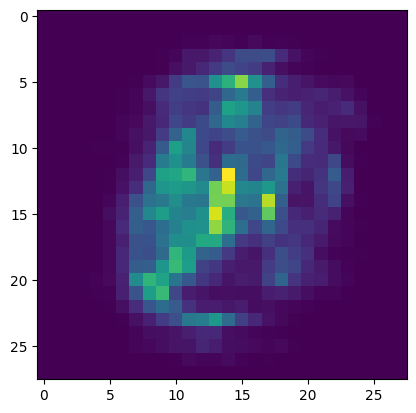

In [36]:
fig, ax = plt.subplots()
ax.imshow(arr)

since the value at the perimeter are either the same or very similar

## Question 9 - An incorrect digit

* Find an example of a digit in the test set that was mis-classified by `rfc`.  (Hint.  Start by using `df["digit"] != df["pred"]`.  You could then use Boolean indexing with `X_test.index`, or you could use NumPy's `nonzero` function to find the integer locations where the digits are mis-classified.)
* Display the mis-classified handwritten digit again using `imshow`.
* Display the true value (from `y_test` or from `df["Digit"]`).
* Display the predicted value (using `rfc.predict` or using `df["Pred"]`).
* Does the mistake by our random forest classifier seem reasonable?  (Some will, some won't.  Find an example where the mistake seems reasonable.)

In [39]:
b = df["digit"] != df["pred"]

In [40]:
import numpy as np

In [47]:
b.loc[ b> 0]

23542    True
37887    True
29865    True
40475    True
29973    True
         ... 
34235    True
36271    True
3960     True
37552    True
18557    True
Length: 707, dtype: bool

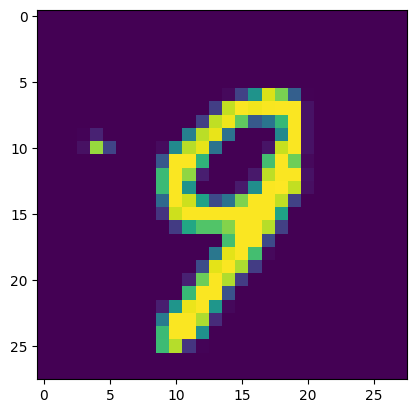

In [52]:
fig, ax = plt.subplots()
ax.imshow(X_test.iloc[3960].values.reshape(28,28))

In [88]:
df["digit"].iloc[3960]

9

In [89]:
df["pred"].iloc[3960]

9

It seems pretty reasonable since the predicted number is pretty close to the true number

## Submission

* Reminder: everyone needs to make a submission on Canvas.
* Reminder: include everyone's full name at the top, after **Names**.
* Using the `Share` button at the top right, enable public sharing, and enable Comment privileges. Then submit the created link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=250c924a-f460-405e-a1d3-d44a0c4c7ea0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>